In [1]:
from dolfin import *

In [1]:
from fenics import *

# 制作网格以及定义有限元函数空间
mesh = UnitSquareMesh (8 , 8 )
V = FunctionSpace (mesh,"P",1 )
# Define boundary condition定义边界条件
u_D = Expression ('1 + x[0]* x[0] + 2*x[1]* x [1]', degree=2)

def boundary (x , on_boundary ) :
    """应用哪些点到边界上
    """
    return on_boundary

bc = DirichletBC (V, u_D, boundary)


u = TrialFunction (V)   # 定义实验空间
v = TestFunction (V)   # 定义测试空间
f = Constant (-6.0)  # 定义边界条件   
a = dot(grad(u) , grad(v)) *dx  # 定义变分问题
L = f *v*dx

# 计算解决方案
u = Function(V)
solve ( a == L, u , bc )


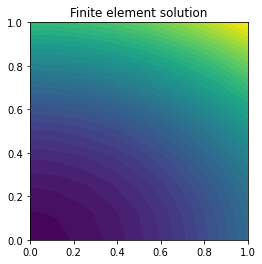

In [2]:

# Plot solution and mesh
plot(u,title="Finite element solution")
#plot(mesh,title ="Finite element mesh")




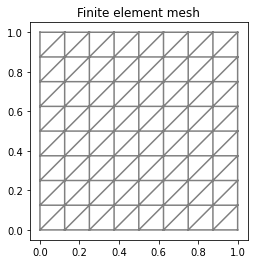

In [3]:
plot(mesh,title ="Finite element mesh")

In [4]:
#将文件保存到VTK格式
vtkfile= File('poisson/solution.pvd')
vtkfile<< u

In [5]:
# # 计算误差 in L2 norm
error_L2 = errornorm (u_D, u , 'L2' )

#ompute maximum error at veryives
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np .max(np . abs ( vertex_values_u_D - vertex_values_u ) )

# Print e r r o r s
print ( 'error_L2 =', error_L2 )
print ( 'error_max =' , error_max )


error_L2 = 0.00823509807335465
error_max = 8.43769498715119e-15


In [6]:
nodal_values_u = u.vector()
array_u = np.array(nodal_values_u)
vertex_values_u = u.compute_vertex_values()
print("array_u结果为：",array_u)
print("vertex_values_u结果为：",vertex_values_u)

array_u结果为： [3.       2.53125  3.015625 2.125    2.546875 3.0625   1.78125  2.140625
 2.59375  3.140625 1.5      1.796875 2.1875   2.671875 3.25     1.28125
 1.515625 1.84375  2.265625 2.78125  3.390625 1.125    1.296875 1.5625
 1.921875 2.375    2.921875 3.5625   1.03125  1.140625 1.34375  1.640625
 2.03125  2.515625 3.09375  3.765625 1.       1.046875 1.1875   1.421875
 1.75     2.171875 2.6875   3.296875 4.       1.015625 1.09375  1.265625
 1.53125  1.890625 2.34375  2.890625 3.53125  1.0625   1.171875 1.375
 1.671875 2.0625   2.546875 3.125    1.140625 1.28125  1.515625 1.84375
 2.265625 2.78125  1.25     1.421875 1.6875   2.046875 2.5      1.390625
 1.59375  1.890625 2.28125  1.5625   1.796875 2.125    1.765625 2.03125
 2.      ]
vertex_values_u结果为： [1.       1.015625 1.0625   1.140625 1.25     1.390625 1.5625   1.765625
 2.       1.03125  1.046875 1.09375  1.171875 1.28125  1.421875 1.59375
 1.796875 2.03125  1.125    1.140625 1.1875   1.265625 1.375    1.515625
 1.6875   1.89062

In [8]:
nodal_valuesu = u.vector().get_local()
nodal_valuesu

array([3.      , 2.53125 , 3.015625, 2.125   , 2.546875, 3.0625  ,
       1.78125 , 2.140625, 2.59375 , 3.140625, 1.5     , 1.796875,
       2.1875  , 2.671875, 3.25    , 1.28125 , 1.515625, 1.84375 ,
       2.265625, 2.78125 , 3.390625, 1.125   , 1.296875, 1.5625  ,
       1.921875, 2.375   , 2.921875, 3.5625  , 1.03125 , 1.140625,
       1.34375 , 1.640625, 2.03125 , 2.515625, 3.09375 , 3.765625,
       1.      , 1.046875, 1.1875  , 1.421875, 1.75    , 2.171875,
       2.6875  , 3.296875, 4.      , 1.015625, 1.09375 , 1.265625,
       1.53125 , 1.890625, 2.34375 , 2.890625, 3.53125 , 1.0625  ,
       1.171875, 1.375   , 1.671875, 2.0625  , 2.546875, 3.125   ,
       1.140625, 1.28125 , 1.515625, 1.84375 , 2.265625, 2.78125 ,
       1.25    , 1.421875, 1.6875  , 2.046875, 2.5     , 1.390625,
       1.59375 , 1.890625, 2.28125 , 1.5625  , 1.796875, 2.125   ,
       1.765625, 2.03125 , 2.      ])

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FF

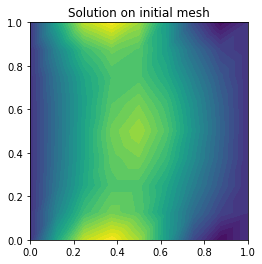

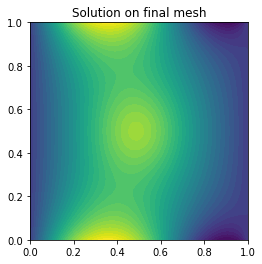

In [2]:
import matplotlib.pyplot as plt
from dolfin import *
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, "Lagrange", 1)
# Define boundary condition
u0 = Function(V)
bc = DirichletBC(V, u0, "x[0] < DOLFIN_EPS || x[0] > 1.0 - DOLFIN_EPS")
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)",
               degree=1)
g = Expression("sin(5*x[0])", degree=1)
a = inner(grad(u), grad(v))*dx()
L = f*v*dx() + g*v*ds()
# Define function for the solution
u = Function(V)
# Define goal functional (quantity of interest)
M = u*dx()
# Define error tolerance
tol = 1.e-5
# Solve equation a = L with respect to u and the given boundary
# conditions, such that the estimated error (measured in M) is less
# than tol
problem = LinearVariationalProblem(a, L, u, bc)
solver = AdaptiveLinearVariationalSolver(problem, M)
solver.parameters["error_control"]["dual_variational_solver"]["linear_solver"] = "cg"
solver.parameters["error_control"]["dual_variational_solver"]["symmetric"] = True
solver.solve(tol)

solver.summary()

# Plot solution(s)
plt.figure()
plot(u.root_node(), title="Solution on initial mesh")
plt.figure()
plot(u.leaf_node(), title="Solution on final mesh")
plt.show()

In [44]:
from mshr import *
from fenics import *
domain = Circle(Point(0 , 0 ) , 1 )
mesh = generate_mesh(domain , 64 )
V = FunctionSpace(mesh, "Lagrange", 1)
u_D = Expression ('1-x[0]* x[0] -x[1]* x [1]', degree=2)

def boundary (x , on_boundary ) :
    """应用哪些点到边界上
    """
    return on_boundary

bc = DirichletBC(V, u_D, boundary)
beta = 8
R0 = 0.6
p = Expression( '4* exp ( - pow( beta , 2 ) *(pow( x [ 0 ] , 2 ) + pow( x [ 1 ] - R0 , 2 ) ) ) ',
degree=1 , beta=beta , R0=R0)
# 之后p的值可以进行任意的修改，如下显示
p.beta = 12
p.R0 = 0.3
w = TrialFunction(V)
v = TestFunction (V)
a = dot ( grad (w) , grad ( v ) ) *dx
L = p*v*dx


u=Function(V)
solve( a == L , u,bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [41]:
bc = DirichletBC(V, u_D, boundary)
bc.get_boundary_values()

{95: -9.150666335777657e-17,
 70: 0.00024427119976704005,
 71: 1.457167719820518e-16,
 45: 0.00024427119976701793,
 7: 6.245004513516506e-17,
 3: 0.0002442711997671966,
 0: 6.245004513516506e-17,
 1: 0.00024427119976715844,
 50: -2.7755575615628914e-17,
 56: 0.00024427119976692946,
 148: 0.00024427119976712375,
 162: -4.163336342344337e-17,
 161: 0.00024427119976710987,
 217: -5.551115123125783e-17,
 265: 0.00024427119976705436,
 311: 5.551115123125783e-17,
 310: 0.0002442711997670821,
 322: 0.0,
 369: 0.0002442711997670266,
 418: 0.0002442711997670821,
 519: -2.7755575615628914e-17,
 518: 0.00024427119976694334,
 531: 0.0,
 659: 0.00024427119976694334,
 732: -5.551115123125783e-17,
 956: -1.1102230246251565e-16,
 955: 0.00024427119976699885,
 1064: 5.551115123125783e-17,
 1154: 0.00024427119976694334,
 1153: -5.551115123125783e-17,
 368: -2.7755575615628914e-17,
 1191: 0.00024427119976694334,
 1343: -1.1102230246251565e-16,
 1366: 0.00024427119976705436,
 1476: 0.00024427119976710987,

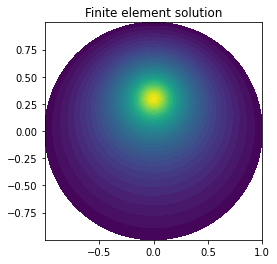

In [45]:
plot(u,title="Finite element solution")
